In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('../input/zomato-bangalore-restaurants/zomato.csv')

In [3]:
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [4]:
percent = (df.isnull().sum()*100/len(df)).sort_values(ascending=False)
percent

dish_liked                     54.291626
rate                           15.033741
phone                           2.335789
approx_cost(for two people)     0.669026
rest_type                       0.438927
cuisines                        0.087012
location                        0.040606
address                         0.000000
name                            0.000000
online_order                    0.000000
book_table                      0.000000
listed_in(city)                 0.000000
votes                           0.000000
listed_in(type)                 0.000000
reviews_list                    0.000000
menu_item                       0.000000
url                             0.000000
dtype: float64

In [5]:
df.rate.unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', nan, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [6]:
df.rate = df.rate.replace('NEW',np.nan)
df.dropna(how ='any', inplace = True)

In [7]:
del df['url']
del df['address']
del df['phone']
del df['location']
df.rename(columns={'approx_cost(for two people)': 'avg_cost', 'listed_in(city)': 'locality','listed_in(type)': 'restaurant_type'}, inplace=True)
df.head()

,name,online_order,book_table,rate,votes,rest_type,dish_liked,cuisines,avg_cost,reviews_list,menu_item,restaurant_type,locality
0,Jalsa,Yes,Yes,4.1/5,775,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1/5,787,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8/5,918,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,Grand Village,No,No,3.8/5,166,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [8]:
df.rate.dtype

dtype('O')

In [9]:
D = df
D.rate = D.rate.astype(str)
D.rate = D.rate.apply(lambda x:x.replace('/5',''))
D.rate = D.rate.apply(lambda x:float(x))
D.rate.unique()

array([4.1, 3.8, 3.7, 4.6, 4. , 4.2, 3.9, 3. , 3.6, 2.8, 4.4, 3.1, 4.3,
       2.6, 3.3, 3.5, 3.2, 4.5, 2.5, 2.9, 3.4, 2.7, 4.7, 2.4, 2.2, 2.3,
       4.8, 4.9, 2.1, 2. , 1.8])

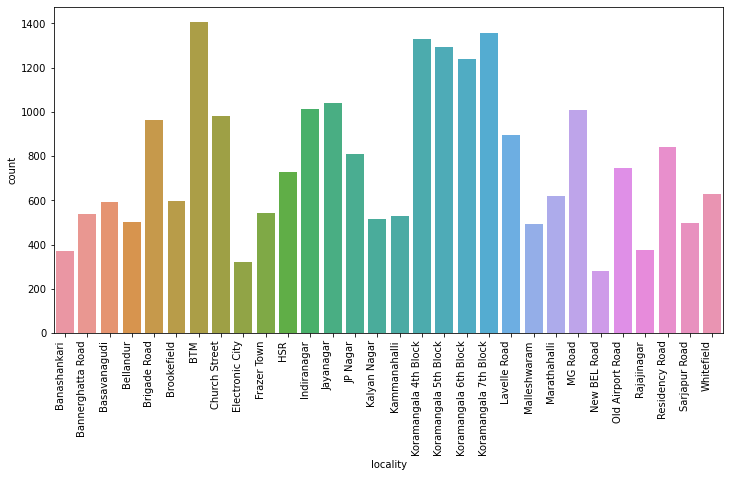

In [10]:
plt.figure(figsize=(12,6))
g = sns.countplot(df['locality'])
g.set_xticklabels(g.get_xticklabels(), rotation=90, ha="right")
g

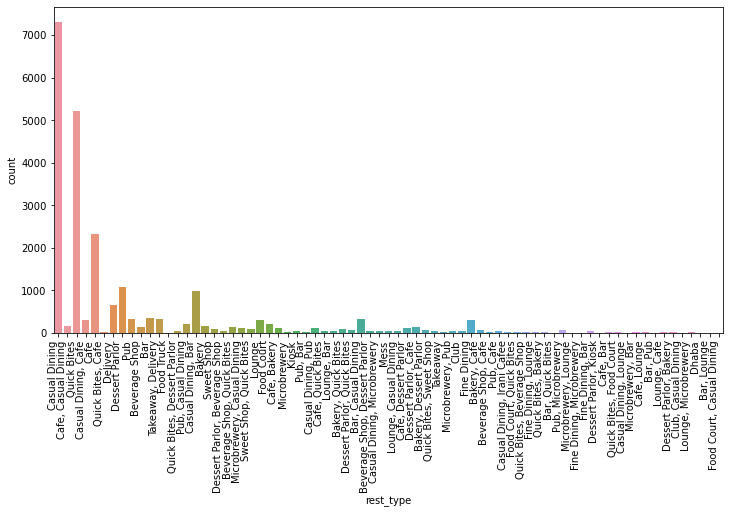

In [11]:
plt.figure(figsize=(12,6))
g = sns.countplot(df['rest_type'])
g.set_xticklabels(g.get_xticklabels(), rotation=90, ha="right")
g

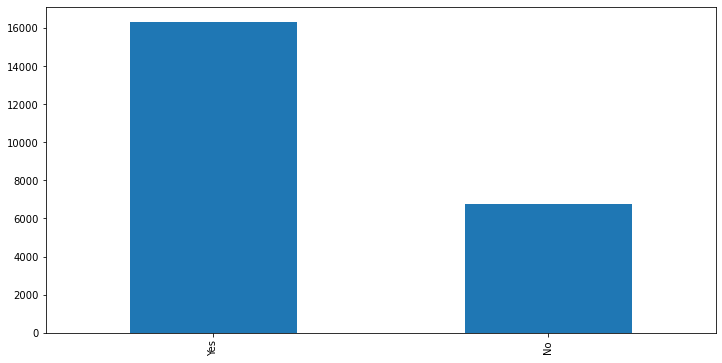

In [12]:
plt.figure(figsize=(12,6))
D['online_order'].value_counts().plot.bar()

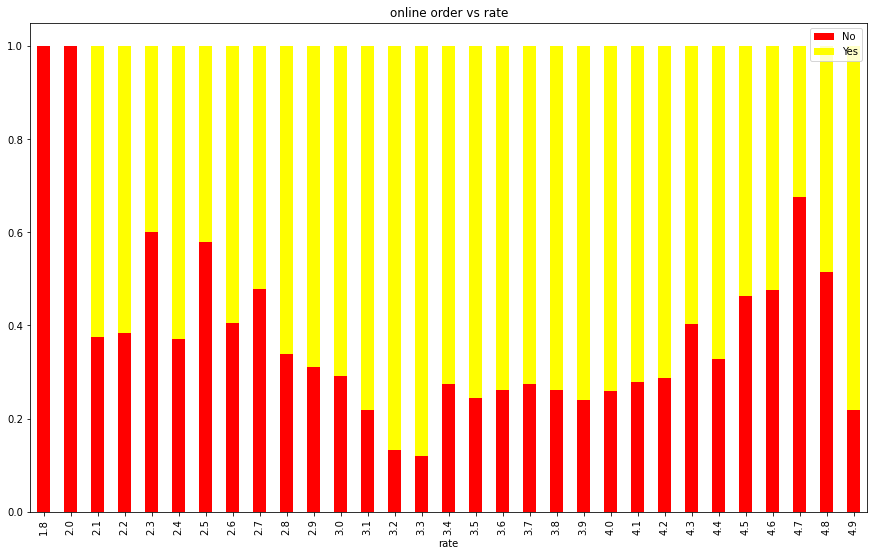

In [13]:
plt.rcParams['figure.figsize'] = (15, 9)
x = pd.crosstab(D['rate'], D['online_order'])
x.div(x.sum(1).astype(float), axis=0).plot(kind='bar',stacked=True, color=['red','yellow'])
plt.title('online order vs rate')
plt.legend(loc='upper right')
plt.show()

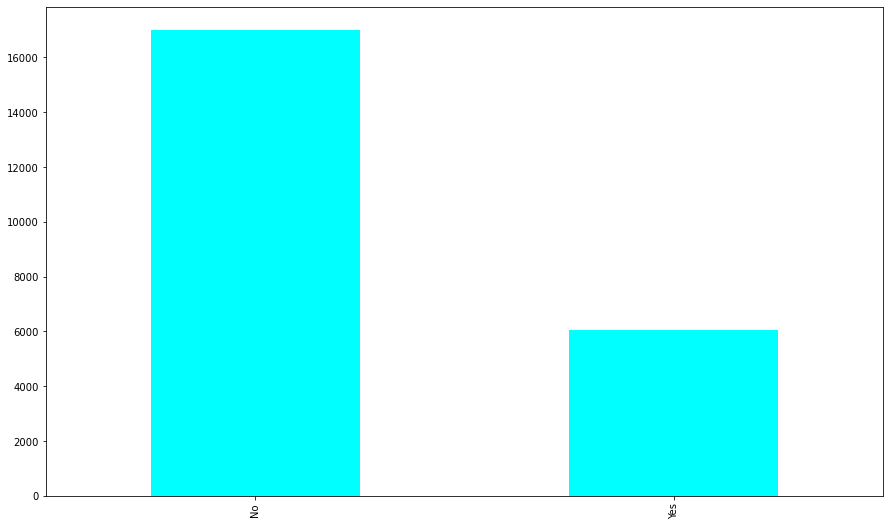

In [14]:
D['book_table'].value_counts().plot.bar(color='cyan')

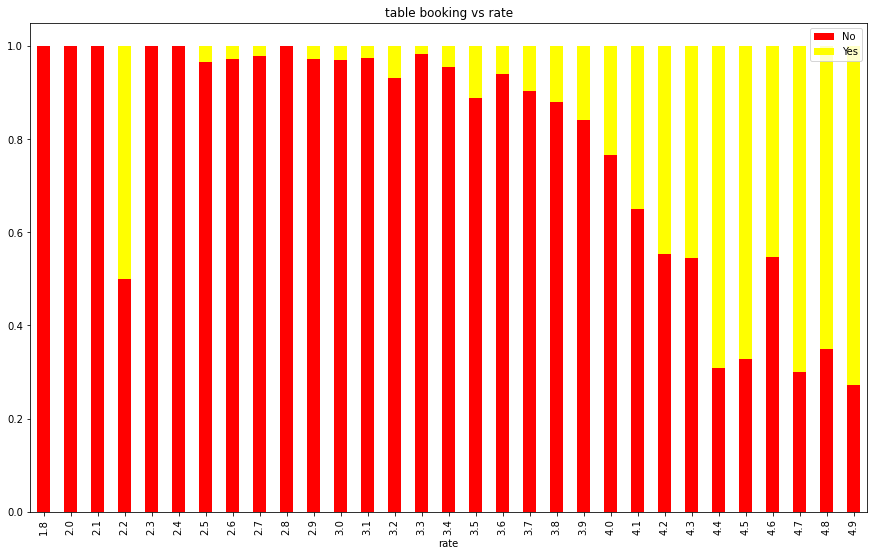

In [15]:
plt.rcParams['figure.figsize'] = (15, 9)
x = pd.crosstab(D['rate'], D['book_table'])
x.div(x.sum(1).astype(float), axis=0).plot(kind='bar',stacked=True, color=['red','yellow'])
plt.title('table booking vs rate')
plt.legend(loc='upper right')
plt.show()

In [16]:
D.head(1)

,name,online_order,book_table,rate,votes,rest_type,dish_liked,cuisines,avg_cost,reviews_list,menu_item,restaurant_type,locality
0,Jalsa,Yes,Yes,4.1,775,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari


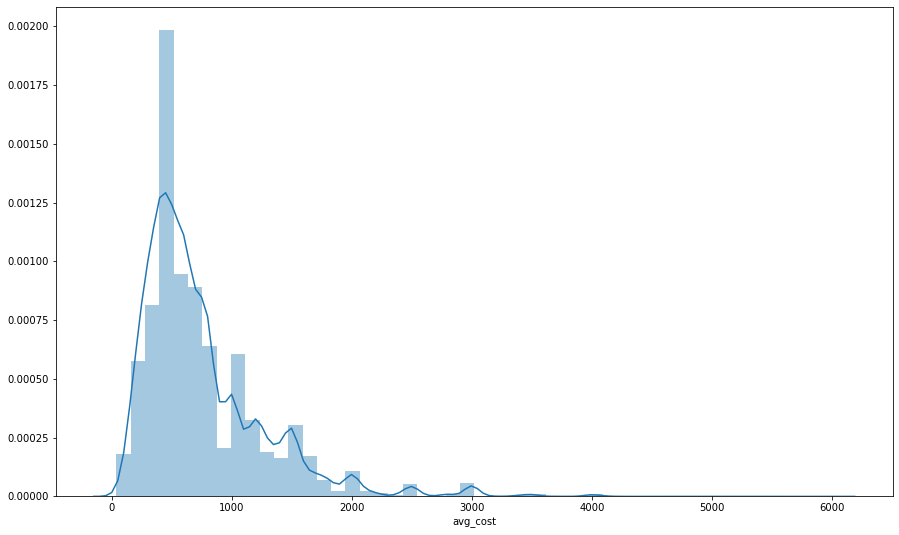

In [17]:
D.avg_cost = D.avg_cost.apply(lambda x: x.replace(',',''))
D.avg_cost = D.avg_cost.astype(int)
sns.distplot(D.avg_cost)

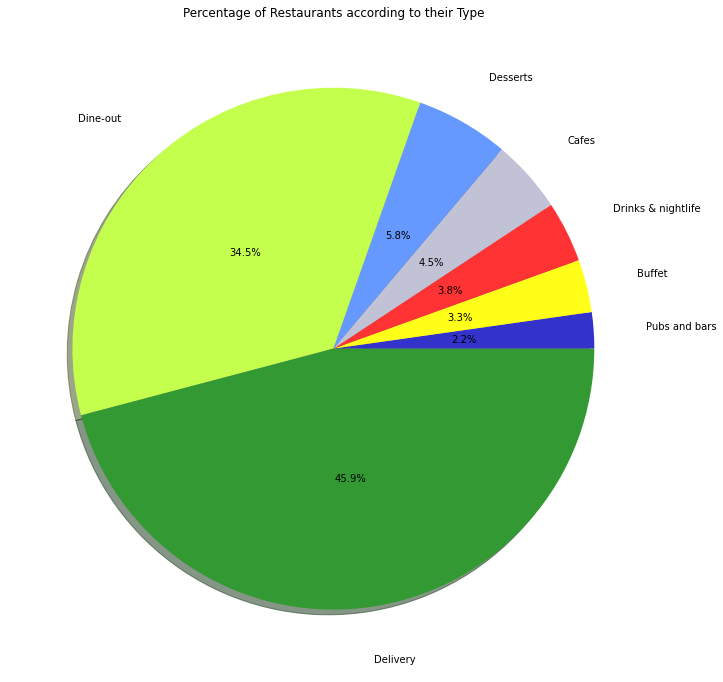

In [18]:
restaurantTypeCount = df['restaurant_type'].value_counts().sort_values(ascending=True)
slices=[restaurantTypeCount[0],
        restaurantTypeCount[1],
        restaurantTypeCount[2],
        restaurantTypeCount[3],
        restaurantTypeCount[4],
        restaurantTypeCount[5],
        restaurantTypeCount[6]]
labels=['Pubs and bars','Buffet','Drinks & nightlife','Cafes','Desserts','Dine-out','Delivery ']
colors = ['#3333cc','#ffff1a','#ff3333','#c2c2d6','#6699ff','#c4ff4d','#339933']
plt.pie(slices, colors=colors, labels=labels, autopct='%1.1f%%', pctdistance=.5, labeldistance=1.2, shadow=True)
fig = plt.gcf()
plt.title("Percentage of Restaurants according to their Type")

fig.set_size_inches(12,12)
plt.show()

In [19]:
D = D.drop_duplicates(subset='name', keep='first')
newdf = D[['name', 'avg_cost', 'locality', 'rest_type', 'cuisines']].groupby(['avg_cost'], sort=True)
newdf = newdf.filter(lambda x:x.mean() <= 1500)
newdf = newdf.sort_values('avg_cost')

newdf_expensive=D[['name','avg_cost','locality','rest_type','cuisines']].groupby(['avg_cost'], sort = True)
newdf_expensive=newdf_expensive.filter(lambda x: x.mean() >= 3000)
newdf_expensive=newdf_expensive.sort_values(by=['avg_cost'])


In [20]:
newdf_rate = D[['name', 'rate']].groupby('rate', sort=True)
newdf_rate = newdf_rate.filter(lambda x: x.mean()  >= 4.5)
newdf_rate = newdf_rate.sort_values('rate')
D.rate.value_counts()
D.rate.unique()
D.nunique()

name               3142
online_order          2
book_table            2
rate                 31
votes               965
rest_type            70
dish_liked         2903
cuisines           1475
avg_cost             56
reviews_list       3107
menu_item           692
restaurant_type       7
locality             30
dtype: int64

In [21]:
s1 = pd.merge(newdf, newdf_rate, how='inner', on=['name'])

s2 = pd.merge(newdf_expensive, newdf_rate, how='inner', on=['name'])

print("Cheap restaurants with low cost,high rating \n")
s1

Cheap restaurants with low cost,high rating 



,name,avg_cost,locality,rest_type,cuisines,rate
0,Brahmin's Coffee Bar,100,Basavanagudi,Quick Bites,South Indian,4.8
1,Taaza Thindi,100,Banashankari,Quick Bites,South Indian,4.7
2,CTR,150,Malleshwaram,Quick Bites,South Indian,4.7
3,Chikkanna Tiffin Room,150,Brigade Road,Quick Bites,South Indian,4.5
4,Veena Stores,150,Malleshwaram,Quick Bites,South Indian,4.5
...,...,...,...,...,...,...
86,Opus Food Stories,1500,Bellandur,"Bar, Casual Dining","Goan, Asian, North Indian, European, Continental",4.7
87,Chianti,1500,Brigade Road,Casual Dining,Italian,4.5
88,Sarjapur Social,1500,Bellandur,"Bar, Casual Dining","American, North Indian, Chinese, Finger Food",4.6
89,Toast & Tonic,1500,Brigade Road,Casual Dining,"European, Asian",4.6


In [22]:
print("Expensive restaurants with high cost,high rating \n")
s2

Expensive restaurants with high cost,high rating 



,name,avg_cost,locality,rest_type,cuisines,rate
0,Rim Naam - The Oberoi,3000,Brigade Road,Fine Dining,Thai,4.6
1,Karavalli - The Gateway Hotel,3500,Brigade Road,Fine Dining,"Mangalorean, Konkan, Seafood, Kerala",4.5
2,Alba - JW Marriott Bengaluru,4000,Brigade Road,Fine Dining,Italian,4.5


In [23]:
# X1.votes.describe()
newdf_votes=D[['name','votes']].groupby(['votes'], sort = True)
newdf_votes=newdf_votes.filter(lambda x: x.mean() >= 175)
newdf_votes=newdf_votes.sort_values(by=['votes'])

In [24]:
s = pd.merge(s1, newdf_votes, how='inner', on=['name'])
s=s.sort_values(by=['avg_cost'])
print("Cheap restaurants,high rating,high votes")
s

Cheap restaurants,high rating,high votes


,name,avg_cost,locality,rest_type,cuisines,rate,votes
0,Brahmin's Coffee Bar,100,Basavanagudi,Quick Bites,South Indian,4.8,2679
1,Taaza Thindi,100,Banashankari,Quick Bites,South Indian,4.7,651
2,CTR,150,Malleshwaram,Quick Bites,South Indian,4.7,4408
3,Chikkanna Tiffin Room,150,Brigade Road,Quick Bites,South Indian,4.5,203
4,Veena Stores,150,Malleshwaram,Quick Bites,South Indian,4.5,2407
...,...,...,...,...,...,...,...
68,Toit,1500,Indiranagar,Microbrewery,"Italian, American, Pizza",4.7,14956
67,Levitate Brewery and Kitchen,1500,Jayanagar,"Microbrewery, Casual Dining","Finger Food, North Indian, Continental",4.5,456
80,Toast & Tonic,1500,Brigade Road,Casual Dining,"European, Asian",4.6,1082
72,Asia Kitchen By Mainland China,1500,BTM,"Casual Dining, Bar","Asian, Chinese, Thai, Momos",4.9,2178


In [25]:
s = pd.merge(s2, newdf_votes, how='inner', on=['name'])
s=s.sort_values(by=['avg_cost'])
s

,name,avg_cost,locality,rest_type,cuisines,rate,votes
0,Rim Naam - The Oberoi,3000,Brigade Road,Fine Dining,Thai,4.6,979
1,Karavalli - The Gateway Hotel,3500,Brigade Road,Fine Dining,"Mangalorean, Konkan, Seafood, Kerala",4.5,674
2,Alba - JW Marriott Bengaluru,4000,Brigade Road,Fine Dining,Italian,4.5,583
